In [1]:
import pandas as pd
import pymc3 as pm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
crash = pd.read_csv('../DS_6040_Project/CrashData_Basic_With_Roads_BlockGroups.csv', low_memory=False)

In [3]:
weather_dict = {1: 'No Adverse Conditions',
3: 'Fog',
4: 'Mist',
5: 'Rain',
6: 'Snow',
7: 'Sleet/Hail',
8: 'Smoke/Dust',
9: 'Other',
10: 'Blowing Sand/Soil/Dirt/Snow',
11: 'Severe Crosswinds',
99: 'Not Applicable'}

In [4]:
light_condition = {1: 'Dawn',
                   2: 'Daylight',
                   3: 'Dusk',
                   4: 'Darkness-Road Lighted',
                   5: 'Darkness-Road not Lighted',
                   6: 'Darkness-Road Lighting Unknown',
                   7: 'Unknown'}

In [5]:
alignment_dict = {1: 'Straight-Level',
3: 'Grade-Level',
2: 'Curve-Level',
4: 'Grade-Curve',
5: 'Hillcrest-Straight',
6: 'Hillcrest-Curve',
7: 'Dip-Straight',
8: 'Dip-Curve',
9: 'Other',
10: 'On/Off Ramp'}

In [6]:
surface_type = {1: 'Concrete',
                   2: 'Blacktop, Asphalt, Bituminous',
                   3: 'Brick or Block',
                   4: 'Slag, Gravel, Stone',
                   5: 'Dirt',
                   6: 'Other'}

In [7]:
defect_dict = {1: 'No Defects',
3: 'Soft or Low Shoulder',
2: 'Holes, Ruts, Bumps',
4: 'Under Repair',
5: 'Loose Material',
6: 'Restricted Width',
7: 'Slick Pavement',
8: 'Roadway Obstructed',
9: 'Other',
10: 'Edge Pavement Dropoff'}

In [8]:
description_dict = {1: 'Two-Way, Not Divided',
3: 'Two-Way, Divided, Positive Median Barrier',
2: 'Two-Way, Divided, Unprotected Median',
4: 'One-Way, Not Divided',
5: 'Other'}

In [9]:
traffic_status = {1: 'Yes - Working',
                   2: 'Yes - Working and Obscured',
                   3: 'Yes - Not Working',
                   4: 'Yes - Not Working and Obscured',
                   5: 'Yes - Missing',
                   6: 'No Traffic Control Device Present'}

In [10]:
workzone_dict = {1: 'Lane Closure',
3: 'Work on Shoulder or Median',
2: 'Lane Shift/Crossover',
4: 'Intermittent or Moving Work',
5: 'Other',
0: 'Non Workzone'}

In [11]:
area = {1: 'Urban',
        0: 'Rural'}

In [12]:
severity_dict = {'O': 'Property Damage Only',
'B': 'Visible Injury',
'C': 'Non Visible Injury',
'A': 'Severe Injury',
'K': 'Fatal Injury'}

In [13]:
population = pd.read_csv('population.csv')

In [14]:
crash.head()

,OID_,Join_Count,TARGET_FID,CRASH_DT,CRASH_SEVERITY,WEATHER_CONDITION,LIGHT_CONDITION,RD_TYPE,ROADWAY_SURFACE_COND,ROADWAY_ALIGNMENT,...,SEGMENT_EXISTS,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,Shape_Length_1,GEOID_1,B01001e1,B01001m1
0,1,1.0,346205.0,8/31/2015 5:00:00,O,1,4,0,1,1,...,NaN,51.0,660.0,205.0,1.0,5.166000e+11,0.103457,15000US516600002051,6039.0,635.0
1,2,1.0,439769.0,1/12/2015 5:00:00,B,5,2,0,2,1,...,Y,51.0,59.0,440201.0,1.0,5.105944e+11,0.075555,15000US510594402011,3352.0,304.0
2,3,2.0,372042.0,12/4/2015 5:00:00,O,1,2,0,1,1,...,Y,51.0,61.0,930402.0,3.0,5.106193e+11,0.142080,15000US510619304023,3360.0,322.0
3,4,1.0,382083.0,3/14/2015 5:00:00,C,1,4,0,2,3,...,Y,51.0,59.0,491402.0,1.0,5.105949e+11,0.037802,15000US510594914021,2390.0,408.0
4,5,1.0,617812.0,9/18/2015 5:00:00,O,1,5,0,1,1,...,Y,51.0,165.0,10400.0,1.0,5.116501e+11,0.491116,15000US511650104001,1072.0,165.0


In [15]:
crash_withpop = pd.merge(crash, population, how='left', left_on = 'COUNTYFP', right_on='CountyFIPS')


In [16]:
crash_withpop

,OID_,Join_Count,TARGET_FID,CRASH_DT,CRASH_SEVERITY,WEATHER_CONDITION,LIGHT_CONDITION,RD_TYPE,ROADWAY_SURFACE_COND,ROADWAY_ALIGNMENT,...,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,Shape_Length_1,GEOID_1,B01001e1,B01001m1,CountyFIPS,Population
0,1,1.0,346205.0,8/31/2015 5:00:00,O,1,4,0,1,1,...,660.0,205.0,1.0,5.166000e+11,0.103457,15000US516600002051,6039.0,635.0,660.0,"54,810"
1,2,1.0,439769.0,1/12/2015 5:00:00,B,5,2,0,2,1,...,59.0,440201.0,1.0,5.105944e+11,0.075555,15000US510594402011,3352.0,304.0,59.0,"1,150,309"
2,3,2.0,372042.0,12/4/2015 5:00:00,O,1,2,0,1,1,...,61.0,930402.0,3.0,5.106193e+11,0.142080,15000US510619304023,3360.0,322.0,61.0,"72,972"
3,4,1.0,382083.0,3/14/2015 5:00:00,C,1,4,0,2,3,...,59.0,491402.0,1.0,5.105949e+11,0.037802,15000US510594914021,2390.0,408.0,59.0,"1,150,309"
4,5,1.0,617812.0,9/18/2015 5:00:00,O,1,5,0,1,1,...,165.0,10400.0,1.0,5.116501e+11,0.491116,15000US511650104001,1072.0,165.0,165.0,"83,757"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901832,901833,2.0,523003.0,4/17/2022 5:00:00,O,1,2,0,1,1,...,153.0,900300.0,1.0,5.115390e+11,0.061243,15000US511539003001,1426.0,322.0,153.0,"482,204"
901833,901834,1.0,376240.0,1/11/2022 5:00:00,O,1,5,0,1,1,...,59.0,481103.0,2.0,5.105948e+11,0.019057,15000US510594811032,1817.0,293.0,59.0,"1,150,309"
901834,901835,2.0,208326.0,1/26/2022 5:00:00,O,1,4,0,1,4,...,775.0,10100.0,1.0,5.177501e+11,0.077070,15000US517750101001,1516.0,430.0,775.0,"25,346"
901835,901836,1.0,178181.0,2/3/2022 5:00:00,O,5,5,2,2,1,...,71.0,930300.0,1.0,5.107193e+11,0.396275,15000US510719303001,1248.0,320.0,71.0,"16,787"


In [17]:
crash_for_ml = crash_withpop[['CRASH_DT','WEATHER_CONDITION','LIGHT_CONDITION','ROADWAY_ALIGNMENT',
                             'ROADWAY_SURFACE_TYPE','ROADWAY_DEFECT', 'ROADWAY_DESCRIPTION',
                              'TRFC_CTRL_STATUS_TYPE','WORK_ZONE_TYPE','AREA_TYPE',
                              'Population', 
                              'CRASH_SEVERITY' ]]

In [18]:
replace_map = {'WEATHER_CONDITION':weather_dict,
              'LIGHT_CONDITION':light_condition,
              'ROADWAY_ALIGNMENT':alignment_dict,
              'ROADWAY_SURFACE_TYPE':surface_type,
              'ROADWAY_DEFECT':defect_dict,
              'ROADWAY_DESCRIPTION':description_dict,
              'TRFC_CTRL_STATUS_TYPE':traffic_status ,
               'WORK_ZONE_TYPE':workzone_dict,
               'AREA_TYPE':area,
               'CRASH_SEVERITY':severity_dict
              }
crash_final = crash_for_ml.replace(replace_map)

In [19]:
crash_final.WEATHER_CONDITION = crash_final.WEATHER_CONDITION.astype('category')
crash_final.LIGHT_CONDITION = crash_final.LIGHT_CONDITION.astype('category')
crash_final.ROADWAY_ALIGNMENT = crash_final.ROADWAY_ALIGNMENT.astype('category')
crash_final.ROADWAY_SURFACE_TYPE = crash_final.ROADWAY_SURFACE_TYPE.astype('category')
crash_final.ROADWAY_DEFECT = crash_final.ROADWAY_DEFECT.astype('category')
crash_final.ROADWAY_DESCRIPTION = crash_final.ROADWAY_DESCRIPTION.astype('category')
crash_final.TRFC_CTRL_STATUS_TYPE = crash_final.TRFC_CTRL_STATUS_TYPE.astype('category')
crash_final.WORK_ZONE_TYPE = crash_final.WORK_ZONE_TYPE.astype('category')
crash_final.AREA_TYPE = crash_final.AREA_TYPE.astype('category')
crash_final.CRASH_SEVERITY = crash_final.CRASH_SEVERITY.astype('category')
crash_final.Population = crash_final.Population.str.replace(',','')
crash_final.Population = crash_final.Population.astype('float')
crash_final.CRASH_DT = pd.to_datetime(crash_final.CRASH_DT)

In [21]:
crash_2022 = crash_final[crash_final['CRASH_DT'] > '01/01/2022']

In [23]:
def plot_traces(traces, retain=0):
    '''
    Convenience function:
    Plot traces with overlaid means and values
    '''

    ax = pm.traceplot(traces[-retain:],
                      lines=tuple([(k, {}, v['mean'])
                                   for k, v in pm.summary(traces[-retain:]).iterrows()]))

    for i, mn in enumerate(pm.summary(traces[-retain:])['mean']):
        ax[i,0].annotate('{:.2f}'.format(mn), xy=(mn,0), xycoords='data'
                    ,xytext=(5,10), textcoords='offset points', rotation=90
                    ,va='bottom', fontsize='large', color='#AA0022')

In [24]:
with pm.Model() as model:
    pm.glm.GLM.from_formula(formula = """CRASH_SEVERITY ~  LIGHT_CONDITION + WEATHER_CONDITION
                                        + ROADWAY_DEFECT""" , 
                            data = crash_2022, 
                            family = pm.glm.families.Binomial())

    trace = pm.sample(1000)

The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/
/Users/carlykelly/opt/anaconda3/lib/python3.8/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ROADWAY_DEFECT[T.Under Repair], ROADWAY_DEFECT[T.Soft or Low Shoulder], ROADWAY_DEFECT[T.Slick Pavement], ROADWAY_DEFECT[T.Roadway Obstructed], ROADWAY_DEFECT[T.Restricted Width], ROADWAY_DEFECT[T.Other], ROADWAY_DEFECT[T.No Defects], ROADWAY_DEFECT[T.Loose Material], ROADWAY_DEFECT[T.Holes, Ruts, Bumps], WEATHER_CONDITION[T.Snow], WEATHER_CONDITION[T.Smoke/Dust], WEATHER_CONDITION[T.Sleet/Hail]

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 984 seconds.
There were 487 divergences after tuning. Increase `target_accept` or reparameterize.
There were 494 divergences after tuning. Increase `target_accept` or reparameterize.
There were 532 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.9039508759278846, but should be close to 0.8. Try to increase the number of tuning steps.
There were 532 divergences after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


Got error No model on context stack. trying to find log_likelihood in translation.
/Users/carlykelly/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
/var/folders/3h/km70004j0tsdgg0xbgwn94lw0000gn/T/ipykernel_77131/3375047491.py:7: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  ax = pm.traceplot(traces[-retain:],
Got error No model on context stack. trying to find log_likelihood in translation.
/Users/carlykelly/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model w

IndexError: index 20 is out of bounds for axis 0 with size 20

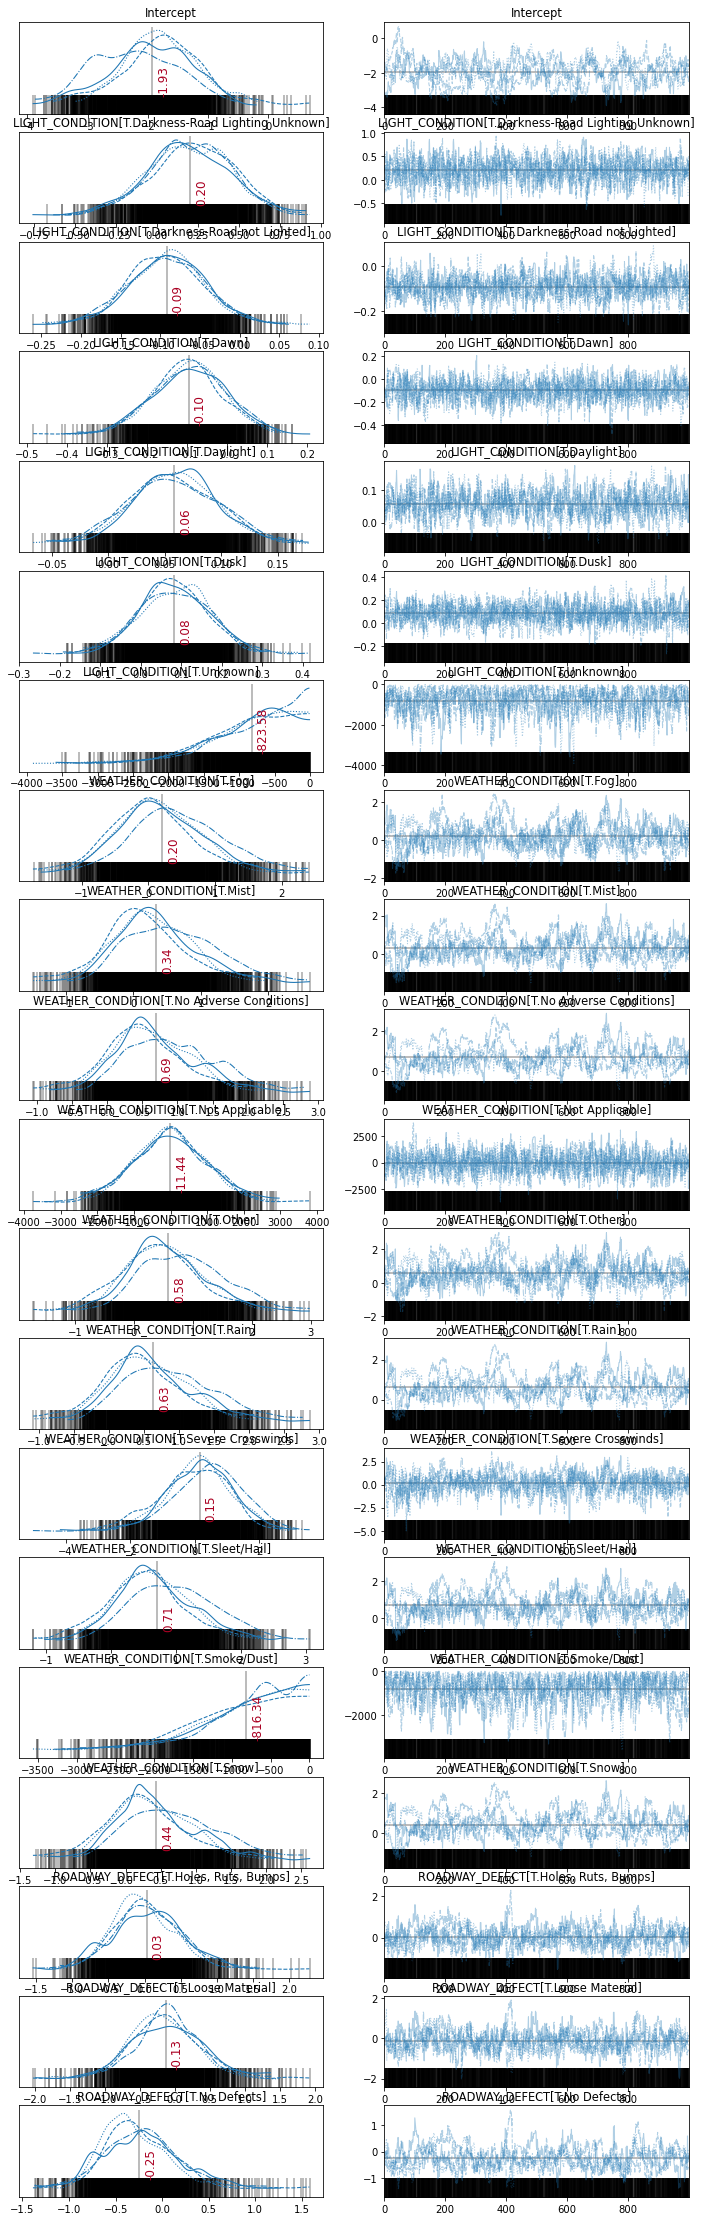

In [25]:
plot_traces(trace)

In [ ]:
crash_final.dtypes

In [40]:
import os
os.getcwd()

'/Users/carlykelly/Documents/UVA_Files/DS_6040/6040Project'

### Trying to use spike and slab instead

In [41]:
from scipy.special import expit
invlogit = lambda x: 1/(1 + tt.exp(-x))

In [26]:
def get_model(y, X):
    model = pm.Model()
    with model:
        xi = pm.Bernoulli('xi', .05, shape=X.shape[1]) #inclusion probability for each variable
        alpha = pm.Normal('alpha', mu = 0, sd = 5) # Intercept
        beta = pm.Normal('beta', mu = 0, sd = .75 , shape=X.shape[1]) #Prior for the non-zero coefficients
        p = pm.math.dot(X, xi * beta) #Deterministic function to map the stochastics to the output
        y_obs = pm.Bernoulli('y_obs', invlogit(p + alpha),  observed=y)  #Data likelihood
    return model

In [30]:
X_crash_2022 = crash_2022.drop('CRASH_SEVERITY',axis=1)

In [31]:
y_crash_2022 = crash_2022['CRASH_SEVERITY']

In [32]:
get_model(y_crash_2022, X_crash_2022)

TypeError: Unsupported dtype for TensorType: object

In [48]:
def beta_spike_slab(shape,spike):
    inclusion_prop = 0.05
    beta_spike = pm.Normal('beta_spike', 0, spike, shape=shape)

    beta_slab = pm.Normal('beta_slab', 0, 10, shape=shape)

    gamma = pm.Bernoulli('gamma', inclusion_prop, shape=shape)

    beta_spike_slab = pm.Deterministic('beta_spike_slab',(beta_spike * (1-gamma)) + ((beta_slab * gamma)))
    return beta_spike_slab

In [49]:
beta_spike_slab(X_crash_2022, y_crash_2022)

TypeError: No model on context stack, which is needed to instantiate distributions. Add variable inside a 'with model:' block, or use the '.dist' syntax for a standalone distribution.

In [51]:
import arviz as az
az.summary(trace)
#az.summary(hierarchical_trace)

Got error No model on context stack. trying to find log_likelihood in translation.
/Users/carlykelly/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,-1.926,0.693,-3.258,-0.690,0.088,0.066,63.0,255.0,1.06
LIGHT_CONDITION[T.Darkness-Road Lighting Unknown],0.204,0.248,-0.238,0.702,0.008,0.006,940.0,1202.0,1.00
LIGHT_CONDITION[T.Darkness-Road not Lighted],-0.092,0.048,-0.184,-0.000,0.002,0.001,567.0,904.0,1.00
LIGHT_CONDITION[T.Dawn],-0.096,0.090,-0.263,0.074,0.003,0.002,881.0,1189.0,1.00
LIGHT_CONDITION[T.Daylight],0.058,0.038,-0.016,0.127,0.002,0.001,587.0,919.0,1.01
LIGHT_CONDITION[T.Dusk],0.082,0.086,-0.078,0.242,0.003,0.002,887.0,1080.0,1.01
LIGHT_CONDITION[T.Unknown],-823.575,611.527,-1892.687,-3.985,26.012,18.403,550.0,990.0,1.00
WEATHER_CONDITION[T.Fog],0.204,0.659,-1.007,1.480,0.076,0.054,87.0,157.0,1.05
WEATHER_CONDITION[T.Mist],0.339,0.636,-0.775,1.615,0.093,0.066,53.0,165.0,1.06
WEATHER_CONDITION[T.No Adverse Conditions],0.689,0.613,-0.370,1.939,0.090,0.064,53.0,134.0,1.07


In [53]:
with pm.Model() as model:
    pm.glm.GLM.from_formula(formula = """CRASH_SEVERITY ~  AREA_TYPE + ROADWAY_DESCRIPTION
                                        + ROADWAY_ALIGNMENT""" , 
                            data = crash_2022, 
                            family = pm.glm.families.Binomial())

    trace = pm.sample(1000)

The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/
/Users/carlykelly/opt/anaconda3/lib/python3.8/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ROADWAY_ALIGNMENT[T.Straight-Level], ROADWAY_ALIGNMENT[T.Other], ROADWAY_ALIGNMENT[T.On/Off Ramp], ROADWAY_ALIGNMENT[T.Hillcrest-Straight], ROADWAY_ALIGNMENT[T.Hillcrest-Curve], ROADWAY_ALIGNMENT[T.Grade-Level], ROADWAY_ALIGNMENT[T.Grade-Curve], ROADWAY_ALIGNMENT[T.Dip-Straight], ROADWAY_ALIGNMENT[T.Dip-Curve], ROADWAY_DESCRIPTION[T.Two-Way, Not Divided], ROADWAY_DESCRIPTION[T.Two-Way, Divided, 

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 219 seconds.


Got error No model on context stack. trying to find log_likelihood in translation.
/Users/carlykelly/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
/var/folders/3h/km70004j0tsdgg0xbgwn94lw0000gn/T/ipykernel_77131/3375047491.py:7: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  ax = pm.traceplot(traces[-retain:],
Got error No model on context stack. trying to find log_likelihood in translation.
/Users/carlykelly/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model w

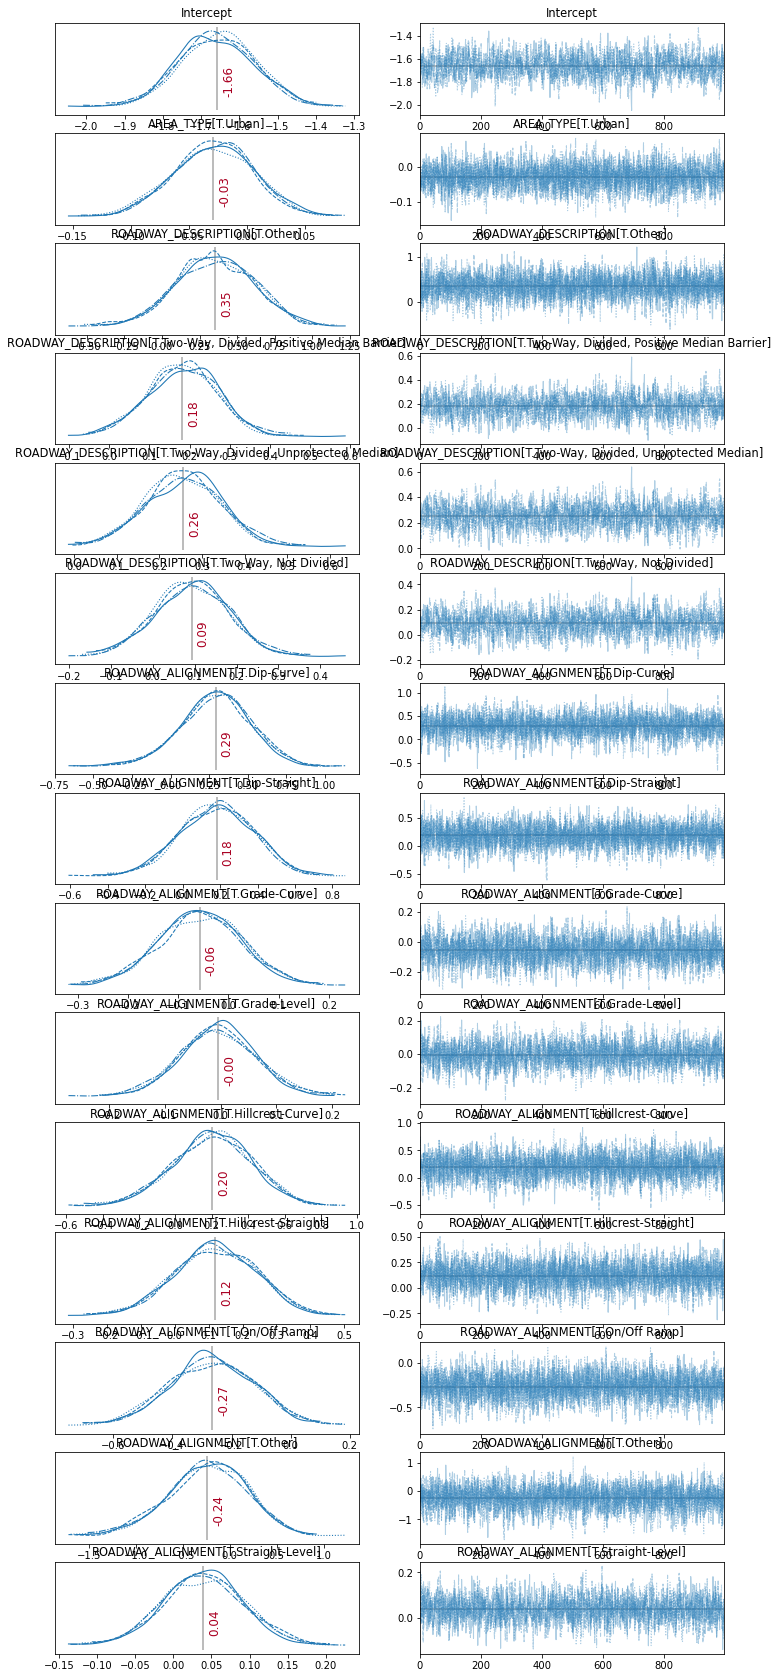

In [54]:
plot_traces(trace)

In [55]:
az.summary(trace)

Got error No model on context stack. trying to find log_likelihood in translation.
/Users/carlykelly/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,-1.658,0.098,-1.835,-1.474,0.003,0.002,1100.0,1487.0,1.0
AREA_TYPE[T.Urban],-0.029,0.034,-0.092,0.036,0.001,0.000,3482.0,2701.0,1.0
ROADWAY_DESCRIPTION[T.Other],0.352,0.258,-0.121,0.836,0.005,0.004,2608.0,2540.0,1.0
"ROADWAY_DESCRIPTION[T.Two-Way, Divided, Positive Median Barrier]",0.182,0.087,0.015,0.343,0.003,0.002,1169.0,1788.0,1.0
"ROADWAY_DESCRIPTION[T.Two-Way, Divided, Unprotected Median]",0.255,0.087,0.089,0.414,0.003,0.002,1167.0,1734.0,1.0
"ROADWAY_DESCRIPTION[T.Two-Way, Not Divided]",0.093,0.087,-0.079,0.245,0.003,0.002,1137.0,1738.0,1.0
ROADWAY_ALIGNMENT[T.Dip-Curve],0.292,0.225,-0.107,0.744,0.004,0.003,3281.0,2695.0,1.0
ROADWAY_ALIGNMENT[T.Dip-Straight],0.181,0.196,-0.177,0.543,0.003,0.002,3853.0,2991.0,1.0
ROADWAY_ALIGNMENT[T.Grade-Curve],-0.057,0.084,-0.215,0.102,0.002,0.001,2464.0,2733.0,1.0
ROADWAY_ALIGNMENT[T.Grade-Level],-0.004,0.068,-0.131,0.125,0.001,0.001,2139.0,2298.0,1.0
